In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df=pd.read_csv('/content/gdrive/My Drive/Datasets/diabetic_data.csv')
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
df.shape

(101766, 50)

# Data Preprocessing

In [0]:
 df['age']=df['age'].str.replace(')',']')

In [0]:
df=df.replace('?',np.NaN)

In [0]:
df['weight']=df['weight'].str.replace(')',']')
df['weight'].value_counts()

[75-100]     1336
[50-75]       897
[100-125]     625
[125-150]     145
[25-50]        97
[0-25]         48
[150-175]      35
[175-200]      11
>200            3
Name: weight, dtype: int64

In [0]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10],NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20],NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30],NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40],NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50],NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
df.isna().sum()

In [0]:
df['gender'].replace('Unknown/Invalid',np.NaN,inplace=True)
df['race'].fillna('Caucasian',inplace=True)
df['gender'].fillna('Female',inplace=True)

In [0]:
df.drop(['encounter_id','patient_nbr','weight','payer_code','admission_type_id','discharge_disposition_id','admission_source_id',
         'medical_specialty','diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [0]:
df.shape

(101766, 39)

# predicting the Medical specialty missing values

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [0]:
df.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [0]:
df.dtypes

race                        object
gender                      object
age                         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide             

In [0]:
# cat_df = df[['gender', 'age','diag_1','diag_2', 'diag_3','max_glu_serum', 'A1Cresult','metformin', 'repaglinide', 'nateglinide',
#              'chlorpropamide','glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone',
#              'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin',
#              'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'change',
#              'diabetesMed', 'readmitted']].copy()
# num_df = df[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
#        'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']].copy()
# target=df['medical_specialty'].copy()
# cat_enc=cat_df.copy()
# cols_encoded=pd.get_dummies(cat_enc)
# all_data=pd.concat([num_df,cols_encoded,target],axis=1)


In [0]:
# ms_train=all_data[all_data['medical_specialty'].notnull()]
# ms_test=all_data[all_data['medical_specialty'].isnull()]


In [0]:
# train_var=ms_train.loc[:,ms_train.columns!='medical_specialty']
# train_target=ms_train.loc[:,'medical_specialty']

In [0]:
# k_feat=SelectKBest(score_func=chi2,k=10)
# fit=k_feat.fit(train_var,train_target)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(train_var.columns)

In [0]:
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Features','Score'] 
# top_features=featureScores.nlargest(10,'Score')


In [0]:
# def accuracy_for_diff_k_vals():
#     k_vals=[10,100,200,300,500]
#     accuracies=[]
#     for each_value in k_vals:
#         k_feat=SelectKBest(score_func=chi2,k=each_value)
#         fit=k_feat.fit(train_var,train_target)
#         dfscores = pd.DataFrame(fit.scores_)
#         dfcolumns = pd.DataFrame(train_var.columns)
#         featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#         featureScores.columns = ['Features','Score'] 
#         top_features=featureScores.nlargest(each_value,'Score')
        
#         cols=top_features.Features
#         new_train_x=ms_train.loc[:,cols]

#         x_train,x_test,y_train,y_test=train_test_split(new_train_x,train_target,test_size=0.2)
#         print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#         scale=StandardScaler().fit(x_train)
#         x_train=scale.transform(x_train)
#         x_test=scale.transform(x_test)
#         model=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
#         predicted_vals=model.predict(x_test)
#         accuracy=sm.accuracy_score(y_test,predicted_vals)
#         accuracies.append(accuracy)
        
#     return (str(k_vals)+':'+str(accuracies) )  

In [0]:
# accuracy_for_diff_k_vals()

In [0]:
# cols=top_features.Features
# new_train_x=ms_train.loc[:,cols]


In [0]:
# x_train,x_test,y_train,y_test=train_test_split(new_train_x,train_target,test_size=0.2)
# print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [0]:
# scale=StandardScaler().fit(x_train)
# x_train=scale.transform(x_train)
# x_test=scale.transform(x_test)

In [0]:
# model=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
# predicted_vals=model.predict(x_test)
# sm.accuracy_score(y_test,predicted_vals)

In [0]:
# ms_test=ms_test.drop('medical_specialty',axis=1)
# test_predictions=model.predict(ms_test)


In [0]:
# ms_test['medical_specialty']=test_predictions
# ms_test.head(5)

In [0]:
# df_ms=ms_train.append(ms_test)

In [0]:
# df_ms=shuffle(df_ms)
# df_ms=df_ms.reset_index(drop=True)
# df_ms.head(10)

In [0]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

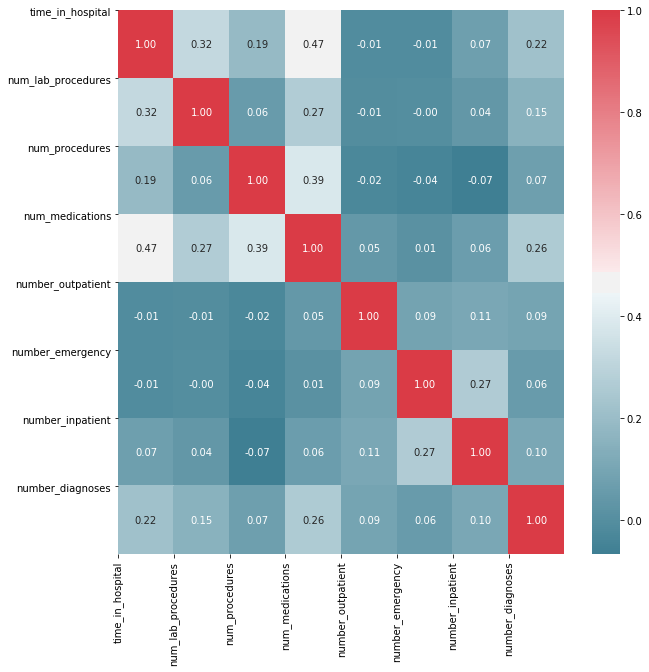

In [0]:
heatMap(df)

In [0]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [0]:
df['race'].value_counts()

Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [0]:
readmitted_notcured=df[(df['readmitted']=='>30')|(df['readmitted']=='<30')]
readmitted_cured=df[(df['readmitted']=='NO')]
readmitted_cured.shape

(54864, 39)

# Readmitted patients by Grouped by Race

race
AfricanAmerican     8789
Asian                226
Caucasian          36442
Hispanic             854
Other                591
Name: readmitted, dtype: int64


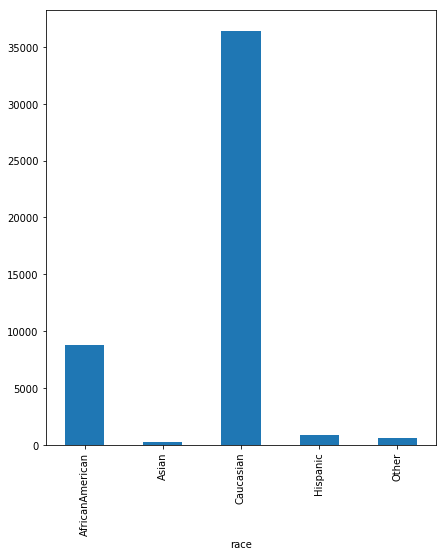

In [0]:
print(readmitted_notcured.groupby('race')['readmitted'].count())
readmitted_notcured.groupby('race')['readmitted'].count().plot(kind='bar',figsize=(7,8))

# Patients Cured from Diabetes grouped by race

race
AfricanAmerican    10421
Asian                415
Caucasian          41930
Hispanic            1183
Other                915
Name: readmitted, dtype: int64


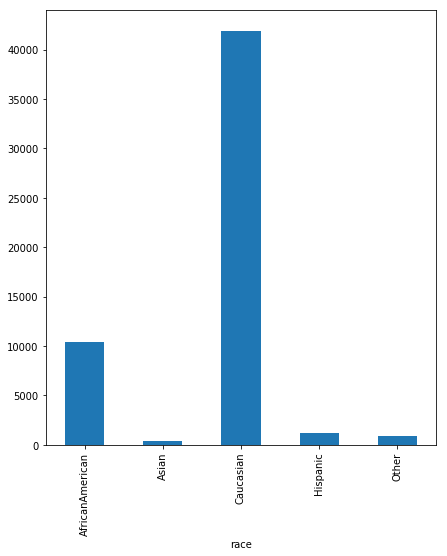

In [0]:
print(readmitted_cured.groupby('race')['readmitted'].count())
readmitted_cured.groupby('race')['readmitted'].count().plot(kind='bar',figsize=(7,8))

# Patients Not Cured from Diabetes grouped by Age and Gender

gender  age     
Female  [0-10]        14
        [10-20]      171
        [20-30]      523
        [30-40]      889
        [40-50]     2196
        [50-60]     3956
        [60-70]     5218
        [70-80]     6743
        [80-90]     5137
        [90-100]     823
Male    [0-10]        15
        [10-20]       93
        [20-30]      223
        [30-40]      722
        [40-50]     2109
        [50-60]     3629
        [60-70]     5181
        [70-80]     5801
        [80-90]     3164
        [90-100]     295
Name: readmitted, dtype: int64


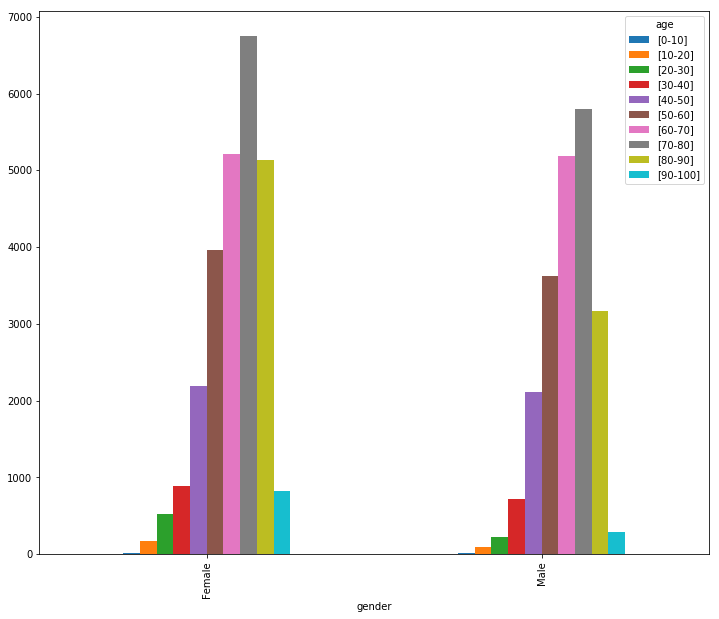

In [0]:
print(readmitted_notcured.groupby(['gender','age'])['readmitted'].count())
readmitted_notcured.groupby(['gender','age'])['readmitted'].count().unstack().plot(kind='bar',figsize=(12,10))


# Patients Cured from Diabetes grouped by Age and Gender

gender  age     
Female  [0-10]        69
        [10-20]      231
        [20-30]      591
        [30-40]     1273
        [40-50]     2615
        [50-60]     4616
        [60-70]     5844
        [70-80]     7244
        [80-90]     5378
        [90-100]    1180
Male    [0-10]        63
        [10-20]      196
        [20-30]      320
        [30-40]      891
        [40-50]     2765
        [50-60]     5055
        [60-70]     6240
        [70-80]     6280
        [80-90]     3518
        [90-100]     495
Name: readmitted, dtype: int64


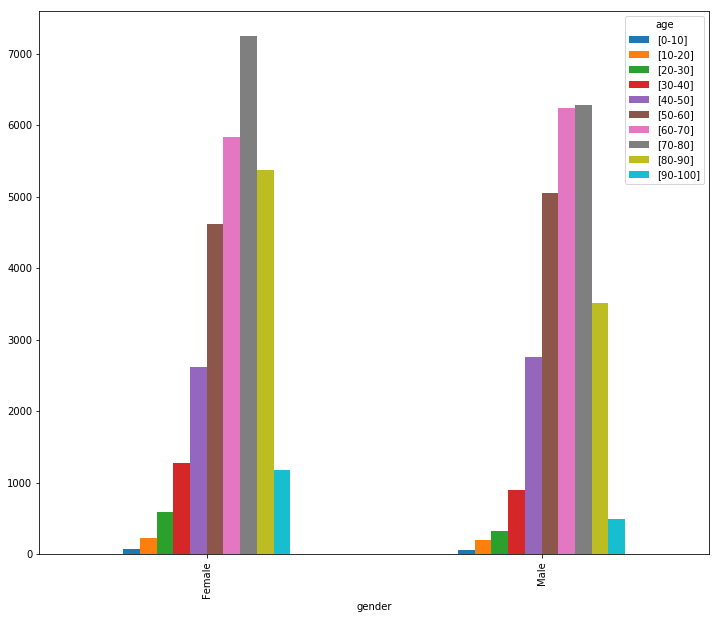

In [0]:
print(readmitted_cured.groupby(['gender','age'])['readmitted'].count())
readmitted_cured.groupby(['gender','age'])['readmitted'].count().unstack().plot(kind='bar',figsize=(12,10))

In [0]:
df.time_in_hospital.max()

14

# Patients Not Cured based on number of days in Hospital

time_range
0-5      32736
6-10     11478
11-15     2688
Name: readmitted, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


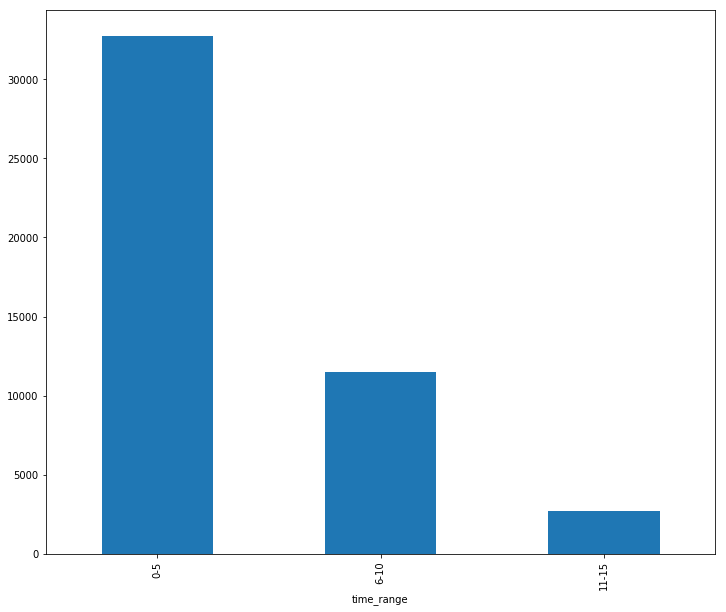

In [0]:
bins=[0,5,10,15]
time=['0-5','6-10','11-15']
readmitted_notcured['time_range']=pd.cut(readmitted_notcured.time_in_hospital,bins,labels=time)
readmitted_notcured['time_range'].value_counts()
print(readmitted_notcured.groupby(readmitted_notcured['time_range'])['readmitted'].count())
readmitted_notcured.groupby(readmitted_notcured['time_range'])['readmitted'].count().plot(kind='bar',figsize=(12,10))

# Patients Cured based on number of days in hospital

time_range
0-5      40342
6-10     11655
11-15     2867
Name: readmitted, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


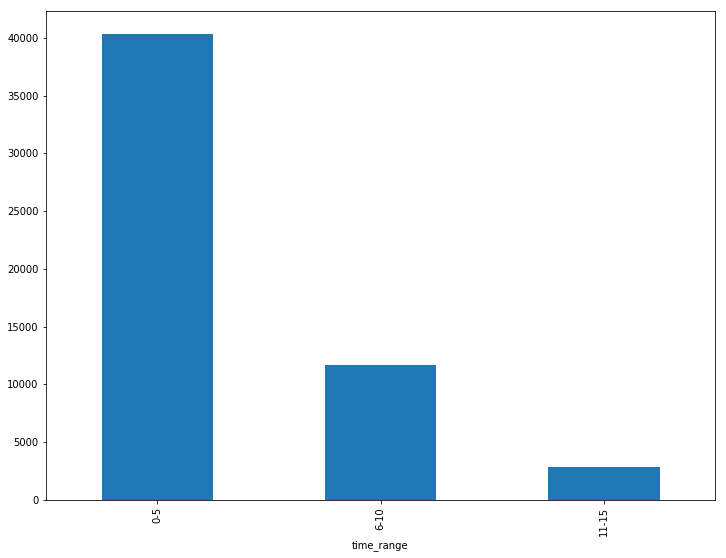

In [0]:
bins=[0,5,10,15]
time=['0-5','6-10','11-15']
readmitted_cured['time_range']=pd.cut(readmitted_cured.time_in_hospital,bins,labels=time)
readmitted_cured['time_range'].value_counts()
print(readmitted_cured.groupby(readmitted_cured['time_range'])['readmitted'].count())
readmitted_cured.groupby(readmitted_cured['time_range'])['readmitted'].count().plot(kind='bar',figsize=(12,9))

# Patients not cured based on Number of Lab Procedures

lab_procedures_range
0-10        3646
11-20       2488
21-30       4288
31-40       8146
41-50      10353
51-60       8455
61-70       6007
71-80       2620
81-90        731
91-100       142
101-110       23
111-120        1
121-130        1
131-140        1
Name: readmitted, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


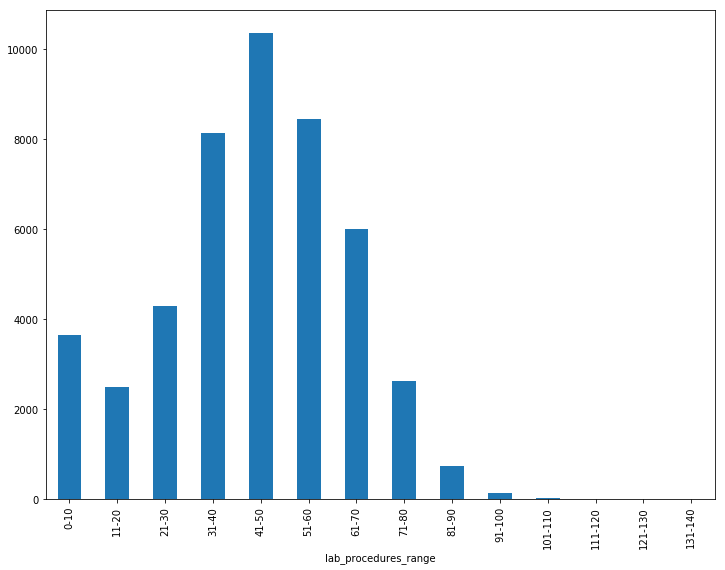

In [0]:
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
count=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120','121-130','131-140']
readmitted_notcured['lab_procedures_range']=pd.cut(readmitted_notcured.num_lab_procedures,bins,labels=count)
print(readmitted_notcured.groupby(readmitted_notcured['lab_procedures_range'])['readmitted'].count())
readmitted_notcured.groupby(readmitted_notcured['lab_procedures_range'])['readmitted'].count().plot(kind='bar',figsize=(12,9))

# Patients Cured based on Number of Lab Procedures

lab_procedures_range
0-10        4737
11-20       3665
21-30       5377
31-40       9938
41-50      11896
51-60       9362
61-70       6252
71-80       2596
81-90        782
91-100       221
101-110       27
111-120        9
121-130        2
131-140        0
Name: readmitted, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


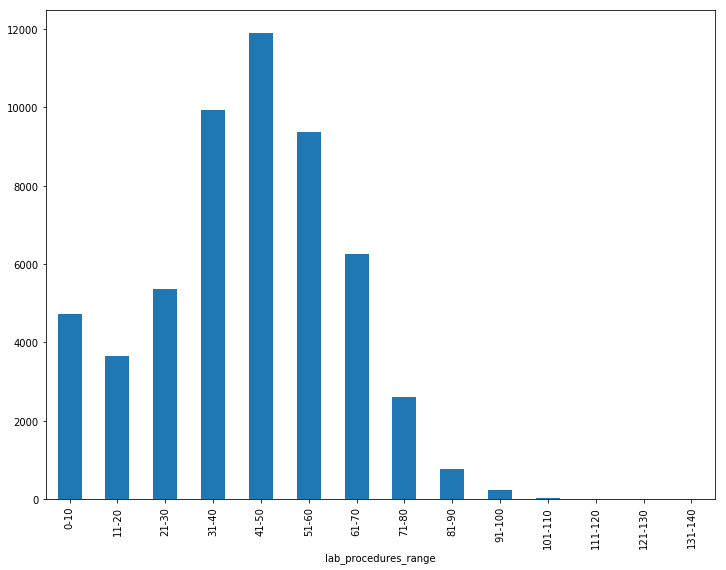

In [0]:
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
count=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120','121-130','131-140']
readmitted_cured['lab_procedures_range']=pd.cut(readmitted_cured.num_lab_procedures,bins,labels=count)
print(readmitted_cured.groupby(readmitted_cured['lab_procedures_range'])['readmitted'].count())
readmitted_cured.groupby(readmitted_cured['lab_procedures_range'])['readmitted'].count().plot(kind='bar',figsize=(12,9))

# Patient not cured after changing medicine 

change
Ch    22830
No    24072
Name: readmitted, dtype: int64


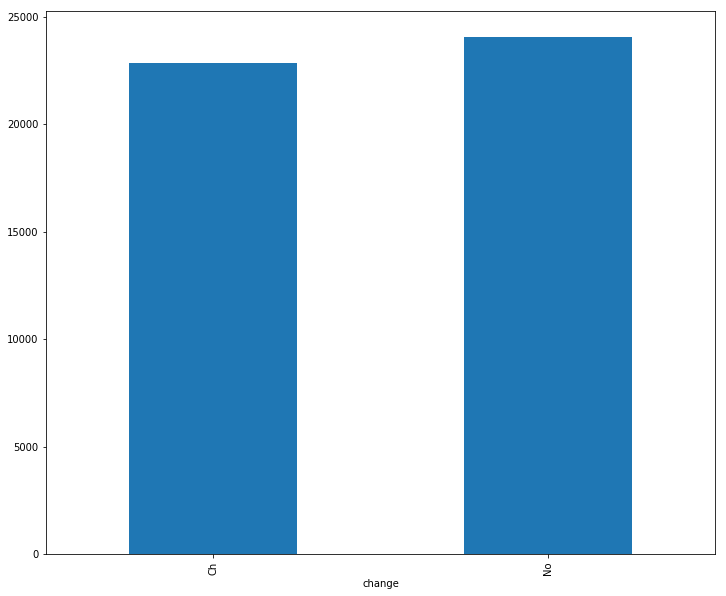

In [0]:
print(readmitted_notcured.groupby(readmitted_notcured['change'])['readmitted'].count())
readmitted_notcured.groupby(readmitted_notcured['change'])['readmitted'].count().plot(kind='bar',figsize=(12,10))

# Patient Cured after changing Medicine

change
Ch    24181
No    30683
Name: readmitted, dtype: int64


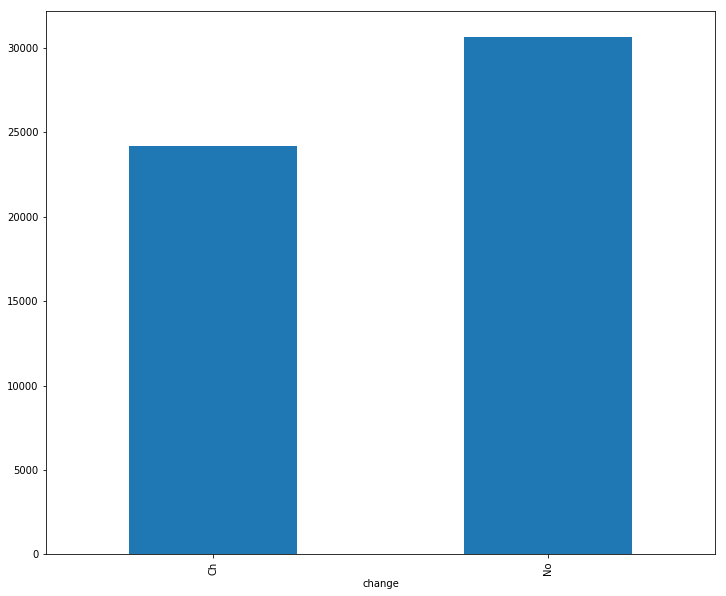

In [0]:
print(readmitted_cured.groupby(readmitted_cured['change'])['readmitted'].count())
readmitted_cured.groupby(readmitted_cured['change'])['readmitted'].count().plot(kind='bar',figsize=(12,10))

# No of times OutPatient and Cured

out_patients
0-5      6626
6-10      259
11-15      42
16-20      15
21-25       6
26-30       2
31-35       1
36-40       1
Name: readmitted, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


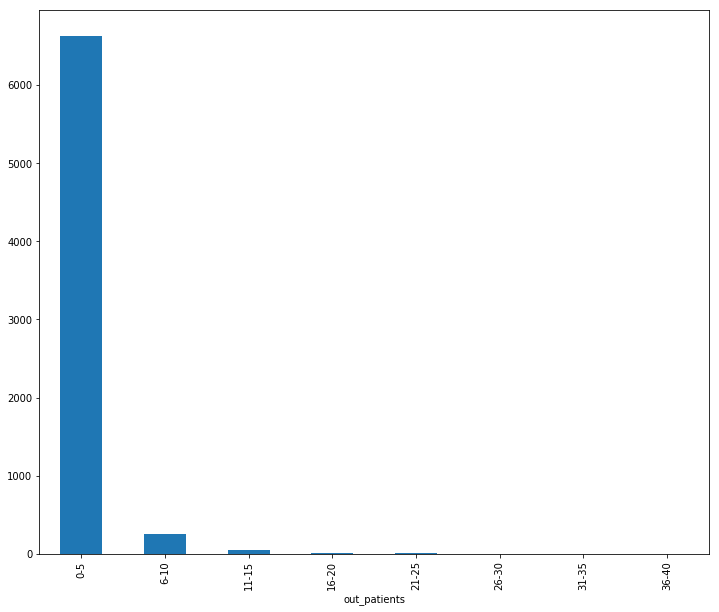

In [0]:
bins=[0,5,10,15,20,25,30,35,40]
count=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40']
readmitted_cured['out_patients']=pd.cut(readmitted_cured.number_outpatient,bins,labels=count)
print(readmitted_cured.groupby(readmitted_cured['out_patients'])['readmitted'].count())
readmitted_cured.groupby(readmitted_cured['out_patients'])['readmitted'].count().plot(kind='bar',figsize=(12,10))

In [0]:
# No of times OutPatient and Not Cured

out_patients
0-5      9189
6-10      437
11-15     109
16-20      23
21-25      13
26-30       6
31-35       4
36-40       5
Name: readmitted, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


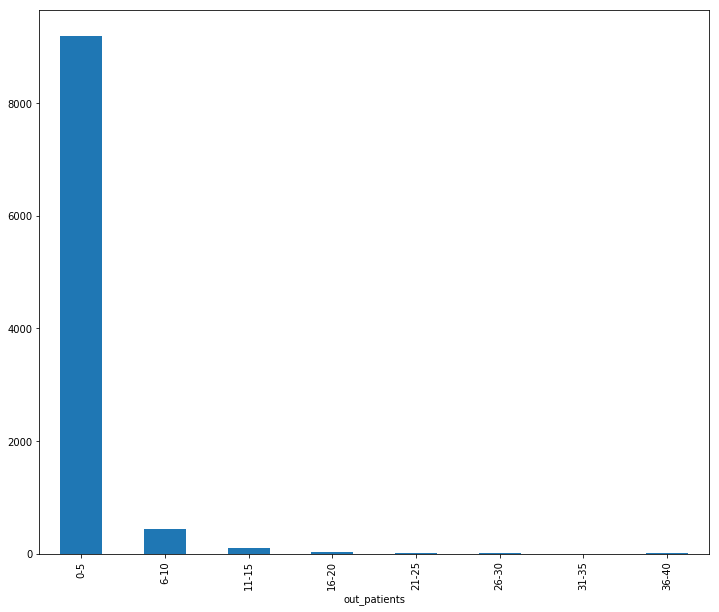

In [0]:
bins=[0,5,10,15,20,25,30,35,40]
count=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40']
readmitted_notcured['out_patients']=pd.cut(readmitted_notcured.number_outpatient,bins,labels=count)
print(readmitted_notcured.groupby(readmitted_notcured['out_patients'])['readmitted'].count())
readmitted_notcured.groupby(readmitted_notcured['out_patients'])['readmitted'].count().plot(kind='bar',figsize=(12,10))

In [0]:
cat_df = df[['race','gender', 'age','max_glu_serum', 'A1Cresult','metformin', 'repaglinide', 'nateglinide',
             'chlorpropamide','glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone',
             'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin',
             'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'change',
             'diabetesMed']].copy()
num_df = df[['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']].copy()
target=df['readmitted'].copy()
cat_enc=cat_df.copy()

le=LabelEncoder()
for i in cat_enc:
    df[i]=le.fit_transform(df[i])   


In [0]:
df.head(5)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0,1,41,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,NO
1,2,0,1,3,59,0,18,0,0,0,...,0,3,1,0,0,0,0,0,1,>30
2,0,0,2,2,11,5,13,2,0,1,...,0,1,1,0,0,0,0,1,1,NO
3,2,1,3,2,44,1,16,0,0,0,...,0,3,1,0,0,0,0,0,1,NO
4,2,1,4,1,51,0,8,0,0,0,...,0,2,1,0,0,0,0,0,1,NO


In [0]:
X=df.loc[:,df.columns!='readmitted']
Y=df.loc[:,'readmitted']

In [0]:
k_feat=SelectKBest(score_func=chi2,k=20)
fit=k_feat.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_var.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] 
top_features=featureScores.nlargest(20,'Score')
top_features

In [0]:
cols=top_features.Features
X=X.loc[:,cols]
X.head(5)

,gender_Male,gender_Female,number_diagnoses,number_outpatient,number_inpatient,num_medications,age_[0-10],number_emergency,diag_1_147,diag_1_148,num_procedures,num_lab_procedures,age_[30-40],age_[90-100],diag_1_142,diag_1_131,age_[80-90],diag_1_143,diag_1_145,diag_1_110
0,NaN,NaN,1,0,0,1,NaN,0,NaN,NaN,0,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,9,0,0,18,NaN,0,NaN,NaN,0,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,6,2,1,13,NaN,0,NaN,NaN,5,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,7,0,0,16,NaN,0,NaN,NaN,1,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5,0,0,8,NaN,0,NaN,NaN,0,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
scale=StandardScaler().fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)
model=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
predicted_vals=model.predict(x_test)
accuracy=sm.accuracy_score(y_test,predicted_vals)